<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/images-processing/3_Color_Thresolds_Blue_Screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [48]:
img = cv2.imread('bluescreen.jpg')
type(img)

numpy.ndarray

In [49]:
img.shape

(360, 640, 3)

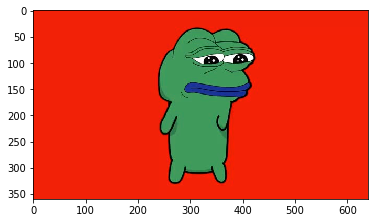

In [50]:
plt.imshow(img)

In [0]:
# look weird, because open cv read image as BGR (blue, green, red), not RGB

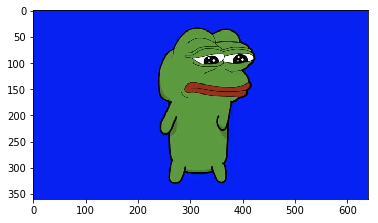

In [52]:
# fix: need to convert to RGB
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

## Define color thresholds

In [0]:
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([50, 50, 255])

## Create a mask

In [0]:
mask = cv2.inRange(img_copy, lower_blue, upper_blue)

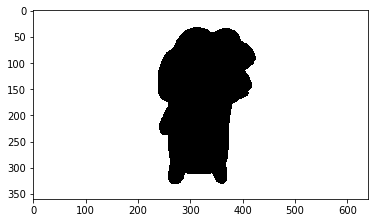

In [55]:
plt.imshow(mask, cmap='gray')

In [0]:
mask_img = np.copy(img_copy)

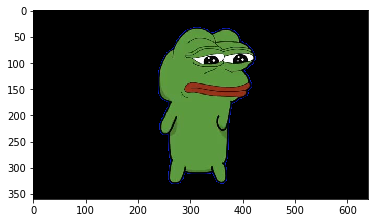

In [57]:
mask_img[mask != 0] = [0, 0, 0]
plt.imshow(mask_img)

## Mask and add a background image

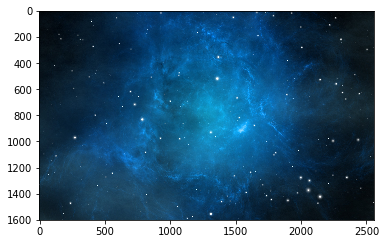

In [60]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

plt.imshow(background_image)

In [63]:
background_image.shape

(1600, 2560, 3)

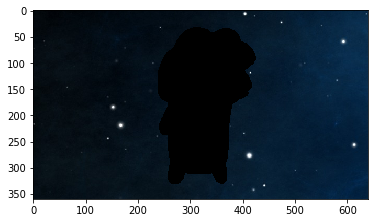

In [69]:
# Crop it to the right size (360x640)
crop_background = background_image[0:360, 0:640]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

## Combined to a completed image

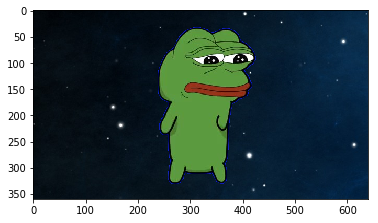

In [71]:
# Add the two images together to create a complete image!
complete_image = mask_img + crop_background

# Display the result
plt.imshow(complete_image)